# Imports

In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_131199/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [3]:
%%R
library(tidyverse)
library(dyno)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: dynfeature
Loading required package: dynguidelines
Loading required package: dynmethods
Loading required package: dynplot
Loading required package: dynwrap
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


# Loading Data

In [4]:
%%R
data <- readRDS("multifurcating_1.rds")

In [5]:
%%R
str(data)

List of 17
 $ id                   : chr "synthetic/splatter/multifurcating_1"
 $ cell_ids             : chr [1:920] "Cell1" "Cell2" "Cell3" "Cell4" ...
 $ cell_info            : NULL
 $ counts               : num [1:920, 1:1254] 48 0 0 18 31 38 11 31 19 17 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:920] "Cell1" "Cell2" "Cell3" "Cell4" ...
  .. ..$ : chr [1:1254] "Gene4247" "Gene4771" "Gene2697" "Gene3227" ...
 $ expression           : num [1:920, 1:1254] 5.25 0 0 4.26 4.36 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:920] "Cell1" "Cell2" "Cell3" "Cell4" ...
  .. ..$ : chr [1:1254] "Gene4247" "Gene4771" "Gene2697" "Gene3227" ...
 $ feature_info         : tibble [1,254 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ feature_id: chr [1:1254] "Gene4247" "Gene4771" "Gene2697" "Gene3227" ...
 $ milestone_ids        : chr [1:9] "M1" "M3" "M6" "M8" ...
 $ milestone_network    : tibble [8 × 4] (S3: tbl_df/tbl/data.frame)
  ..$ from    : chr [1:8] "M1" "M3" "M6" "M3" ...
  ..

In [6]:
%%R
counts <- data$counts
expression <- data$expression
expression

         Gene4247  Gene4771  Gene2697  Gene3227  Gene2112  Gene4564  Gene2255
Cell1   5.2499723 4.4490871 3.7389082 0.8253430 6.6522334 2.6789042 2.4935800
Cell2   0.0000000 4.9002364 3.4836959 3.3698418 5.9569725 3.2462269 0.8866522
Cell3   0.0000000 5.0482955 4.2618294 1.0493835 6.7686366 5.0482955 0.0000000
Cell4   4.2562667 0.0000000 2.3289732 5.0529293 6.4349638 4.9627143 0.0000000
Cell5   4.3589546 2.9866713 3.4692097 4.4860042 3.1994024 3.8301726 3.2950554
Cell6   5.4478011 4.6831463 3.3187876 4.2446215 5.8913866 4.1565769 3.1466509
Cell7   3.5657690 0.0000000 1.5710289 2.9816845 6.7071684 2.5675244 2.7894155
Cell8   4.8067035 5.8033634 2.6376937 2.1642199 6.0881653 4.3938884 5.7806964
Cell9   4.6940113 2.9161953 5.2354114 2.3013292 7.5767285 4.4564967 3.6766455
Cell10  4.3179301 0.0000000 1.0802424 5.1961555 6.4763317 6.3830988 0.0000000
Cell11  5.4466484 5.7542702 2.4871485 4.0978976 6.3507981 4.2799724 1.7239269
Cell12  4.1489702 0.0000000 3.5560264 5.2505116 6.6645207 2.1976

Exception ignored from cffi callback <function _consolewrite_ex at 0x70dce5bb0180>:
Traceback (most recent call last):
  File "/home/satwik/dynooenv/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 140, in _consolewrite_ex
    consolewrite_print(s)
  File "/home/satwik/dynooenv/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 122, in consolewrite_print
    print(s, end='', flush=True)
  File "/home/satwik/dynooenv/lib/python3.12/site-packages/ipykernel/iostream.py", line 694, in write
    self._schedule_flush()
  File "/home/satwik/dynooenv/lib/python3.12/site-packages/ipykernel/iostream.py", line 590, in _schedule_flush
    self.pub_thread.schedule(_schedule_in_thread)
  File "/home/satwik/dynooenv/lib/python3.12/site-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "/home/satwik/dynooenv/lib/python3.12/site-packages/zmq/sugar/socket.py", line 707, in send
    return super().send(data, flags=flags, cop

 5.072786 6.617506 5.945950 4.649796
Cell59  2.8576733 5.483467 5.414689 5.611905 6.324578 6.597079 3.861788
Cell60  4.0736055 6.935705 3.980177 4.396490 6.632159 7.287319 3.880277
Cell61  4.1955392 6.638141 5.356667 3.543491 4.296819 6.713347 3.840458
Cell62  1.9638964 6.200233 5.985832 3.813026 5.476289 6.283186 4.907440
Cell63  3.8431548 6.623084 5.124862 5.166714 5.944774 7.026903 3.620309
Cell64  3.3795664 7.267071 5.294900 5.016081 6.766514 6.311007 3.947198
Cell65  3.5156764 6.789101 4.759863 4.451187 6.839277 7.392292 3.812153
Cell66  2.4153712 6.154210 5.121414 4.263424 6.795689 6.440029 2.988286
Cell67  2.7093519 6.028287 5.536994 3.837607 6.123075 6.503866 4.601053
Cell68  3.8956183 6.481363 4.846318 5.852876 6.163466 7.523613 4.713821
Cell69  2.5959652 6.642417 5.370425 4.260429 6.057388 5.845853 4.012372
Cell70  2.7140289 5.823116 5.823116 3.307199 6.611325 6.659743 3.599678
Cell72  2.2061110 6.435268 5.014530 4.341719 6.147234 6.309427 3.705719
Cell73  2.9415734 6.518707 

In [6]:
%%R
dataset <- wrap_expression(
  expression = expression,
  counts = counts
)

In [7]:
%%R --o grouping
grouping <- data$grouping

In [8]:
%%R
dataset <- add_prior_information(
    dataset,
    start_id = data$prior_information$start_id,
    end_id = data$prior_information$end_id,
    groups_id = data$prior_information$groups_id,
    end_n = data$prior_information$end_n,
)
dataset <- add_grouping(
    dataset,
    data$grouping
)

# Working Models - Scorpius, Angle, PAGA, PAGA Tree, MST, DPT, Component1, Matcher

In [9]:
%%R
umap_dimred <- dyndimred::dimred_umap(dataset$expression)

Loading required namespace: uwot


In [10]:
%%R
pca_dimred <- dyndimred::dimred_pca(dataset$expression)

# Scorpius

In [11]:
%%R
scorpius_model <- infer_trajectory(dataset, ti_scorpius(), give_priors = c("start_id"))

You can run this method as an R wrapper (1, default) or as a container (2)
Which do you want to use? This option will be saved in options(dynwrap_backend = c('r_wrapper', 'container'))
1: R wrapper [default]
2: Container
Following packages have to be installed: SCORPIUS
Do you want to install these packages? 
1: Yes [default]
2: No
Skipping install of 'SCORPIUS' from a github remote, the SHA1 (a0a97907) has not changed since last install.
  Use `force = TRUE` to force installation


Coloring by milestone
Using milestone_percentages from trajectory


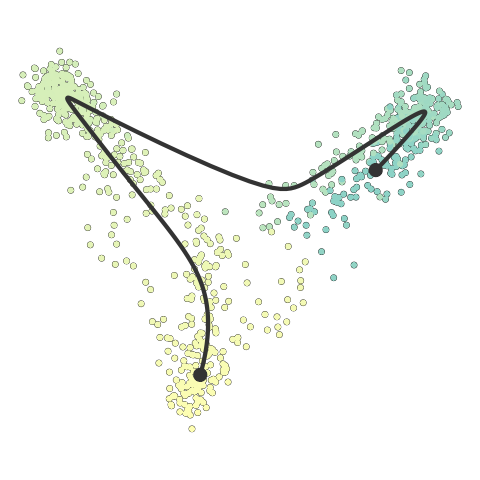

In [12]:
%%R
plot_dimred(scorpius_model, grouping=grouping)

Coloring by milestone
Using milestone_percentages from trajectory


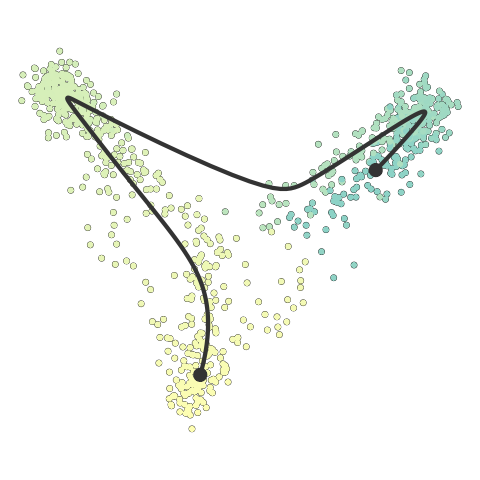

In [ ]:
%%R
plot_dimred(scorpius_model, grouping=grouping)

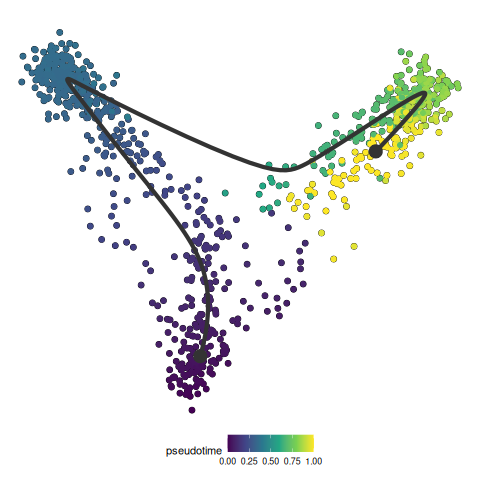

In [13]:
%%R
plot_dimred(scorpius_model, color_cells=c("pseudotime"))

# PAGA

In [14]:
%%R
paga_model <- infer_trajectory(dataset, ti_paga(), give_priors = c("start_id","end_id","groups_id"))

Coloring by milestone
Using milestone_percentages from trajectory


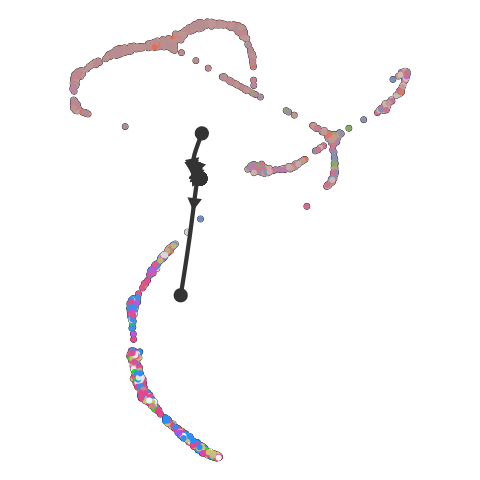

In [15]:
%%R
plot_dimred(paga_model, grouping=grouping)

Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using '2' as root
In addition: Warning message:
In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dynwrap::add_root(). This will result in an error in future releases.


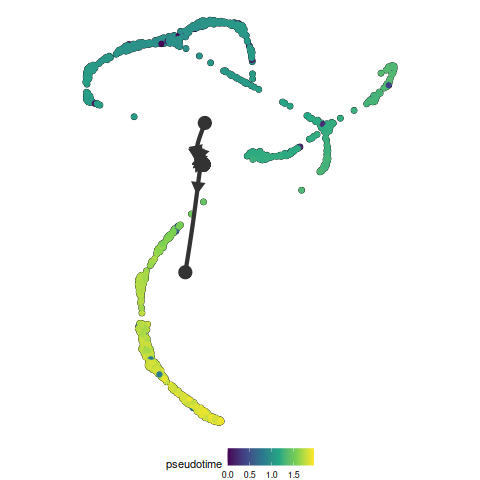

In [16]:
%%R
plot_dimred(paga_model, color_cells=c("pseudotime"))

# Angle

In [17]:
%%R
angle_model <- infer_trajectory(dataset, ti_angle(), give_priors = c("start_id"))

Coloring by milestone
Using milestone_percentages from trajectory


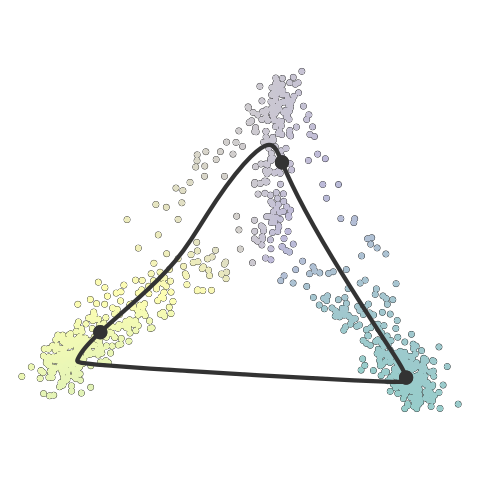

In [18]:
%%R
plot_dimred(angle_model, grouping=grouping)

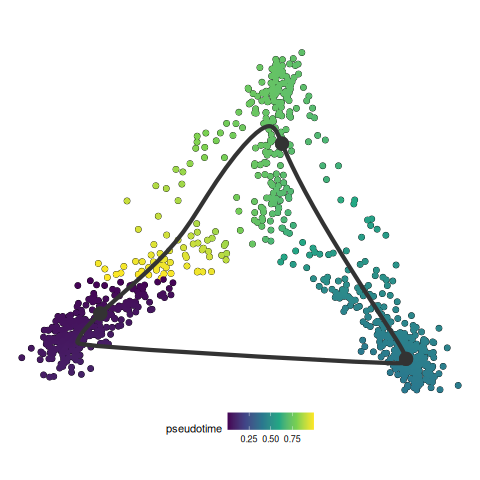

In [19]:
%%R
plot_dimred(angle_model, color_cells=c("pseudotime"))

# PAGA Tree

In [20]:
%%R
paga_tree_model <- infer_trajectory(dataset, ti_paga_tree(), give_priors = c("start_id"))

Coloring by milestone
Using milestone_percentages from trajectory


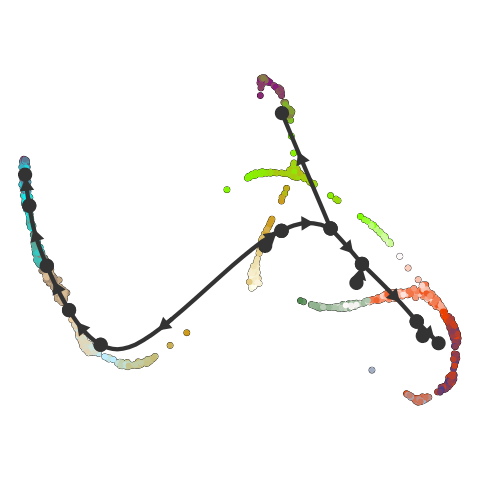

In [21]:
%%R
plot_dimred(paga_tree_model, grouping=grouping)

Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using '6' as root
In addition: Warning message:
In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dynwrap::add_root(). This will result in an error in future releases.


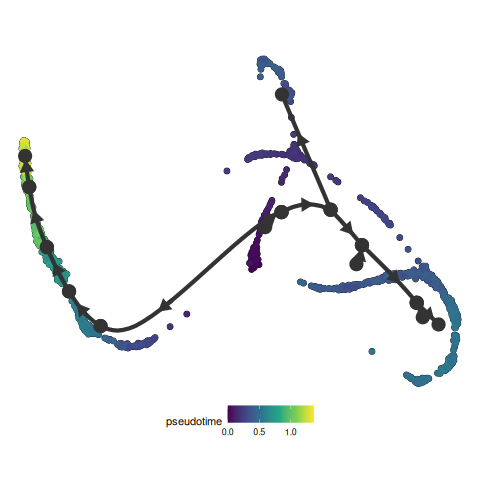

In [22]:
%%R
plot_dimred(paga_tree_model, color_cells=c("pseudotime"))

# MST

In [23]:
%%R
mst_model <- infer_trajectory(dataset, ti_mst(), give_priors = c("start_id"))

Coloring by milestone
Using milestone_percentages from trajectory


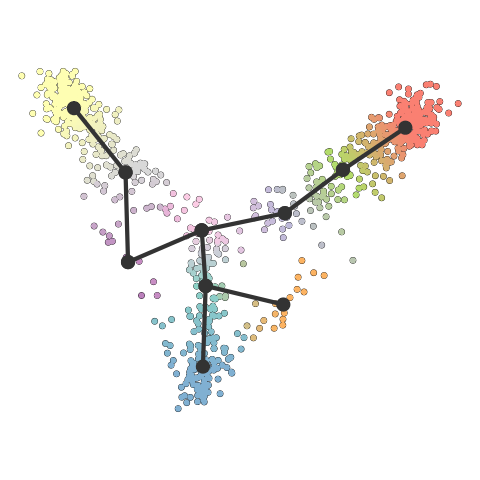

In [24]:
%%R
plot_dimred(mst_model, grouping=grouping)

Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using 'M1' as root
In addition: Warning message:
In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dynwrap::add_root(). This will result in an error in future releases.


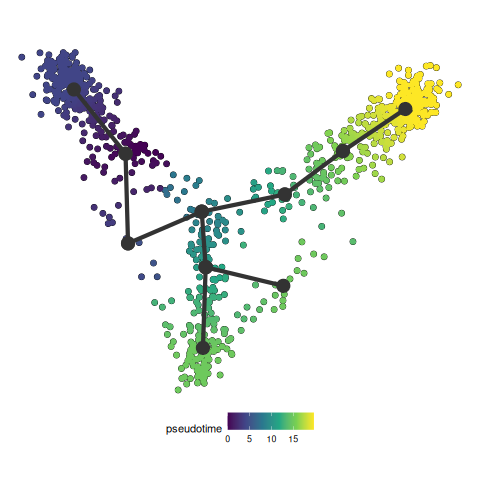

In [25]:
%%R
plot_dimred(mst_model, color_cells=c("pseudotime"))

# DPT

In [26]:
%%R
dpt_model <- infer_trajectory(dataset, ti_dpt(), give_priors = c("start_id"))

Coloring by milestone
Using milestone_percentages from trajectory


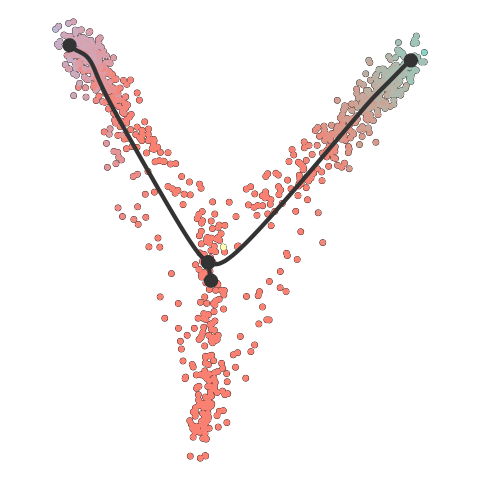

In [27]:
%%R
plot_dimred(dpt_model, grouping=grouping)

Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using 'Tip0' as root
In addition: Warning message:
In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dynwrap::add_root(). This will result in an error in future releases.


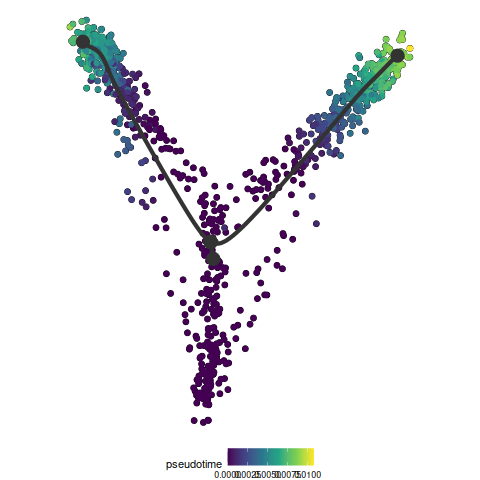

In [28]:
%%R
plot_dimred(dpt_model, color_cells=c("pseudotime"))

# Component1

In [29]:
%%R
comp1_model <- infer_trajectory(dataset, ti_comp1(), give_priors = c("start_id"))

Coloring by milestone
Using milestone_percentages from trajectory


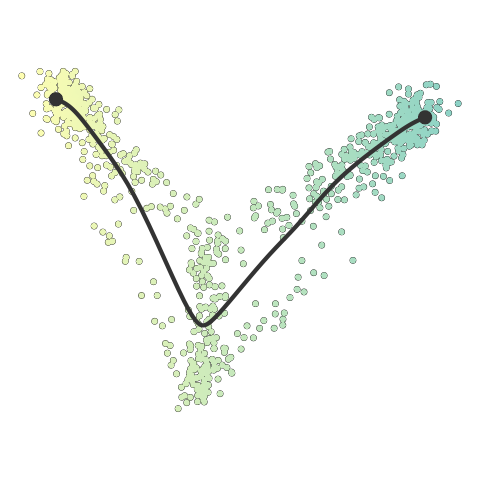

In [30]:
%%R
plot_dimred(comp1_model, grouping=grouping)

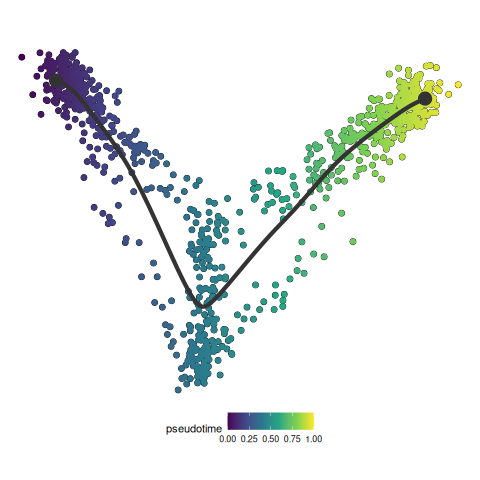

In [31]:
%%R
plot_dimred(comp1_model, color_cells=c("pseudotime"))

# Matcher

In [32]:
%%R
matcher_model <- infer_trajectory(dataset, ti_matcher(), give_priors = c("start_id"))

Coloring by milestone
Using milestone_percentages from trajectory


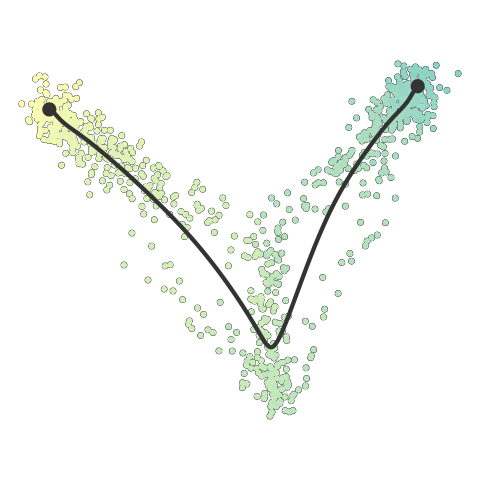

In [33]:
%%R
plot_dimred(matcher_model, expression=data$expression, grouping=grouping)

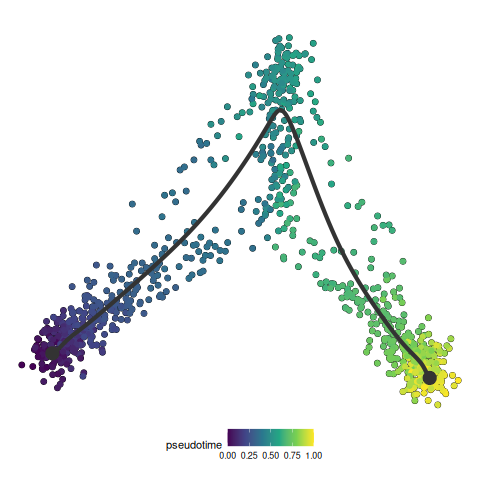

In [34]:
%%R
plot_dimred(matcher_model, expression=data$expression, color_cells=c("pseudotime"))

# Plots

In [35]:
# Scorpius, Angle, PAGA, PAGA Tree, MST, DPT, Component1, Matcher

In [36]:
%%R
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using '6' as root
Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using 'M1' as root
Pseudotime not provided, will calculate pseudotime from root milestone
root cell or milestone not provided, trying first outgoing milestone_id
Using 'Tip0' as root
In addition: Warning messages:
1: In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dynwrap::add_root(). This will result in an error in future releases.
2: In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dynwrap::add_root(). This will result in an error in future releases.
3: In dynwrap::calculate_pseudotime(trajectory) :
  Trajectory is not rooted. Add a root to the trajectory using dyn

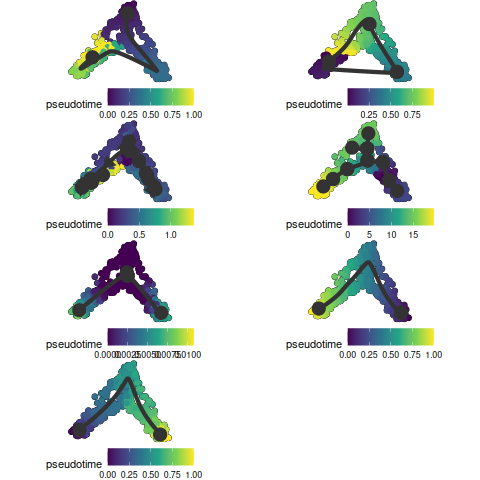

In [37]:
%%R
plt1 <- plot_dimred(scorpius_model, color_cells=c("pseudotime"), dimred=pca_dimred)
plt2 <- plot_dimred(angle_model, color_cells=c("pseudotime"), dimred=pca_dimred)
plt3 <- plot_dimred(paga_tree_model, color_cells=c("pseudotime"), dimred=pca_dimred)
plt4 <- plot_dimred(mst_model, color_cells=c("pseudotime"), dimred=pca_dimred)
plt5 <- plot_dimred(dpt_model, color_cells=c("pseudotime"), dimred=pca_dimred)
plt6 <- plot_dimred(comp1_model, color_cells=c("pseudotime"), dimred=pca_dimred)
plt7 <- plot_dimred(matcher_model, color_cells=c("pseudotime"), dimred=pca_dimred, expression=data$expression)
grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,plt7,nrow=4,ncol=2)
# grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,nrow=3,ncol=2)

Coloring by milestone
Using milestone_percentages from trajectory
Coloring by milestone
Using milestone_percentages from trajectory
Coloring by milestone
Using milestone_percentages from trajectory
Coloring by milestone
Using milestone_percentages from trajectory
Coloring by milestone
Using milestone_percentages from trajectory
Coloring by milestone
Using milestone_percentages from trajectory
Coloring by milestone
Using milestone_percentages from trajectory


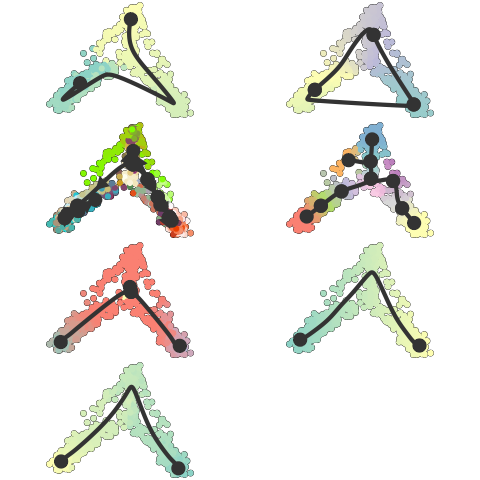

In [38]:
%%R
plt1 <- plot_dimred(scorpius_model, dimred=pca_dimred, grouping=grouping)
plt2 <- plot_dimred(angle_model, dimred=pca_dimred, grouping=grouping)
plt3 <- plot_dimred(paga_tree_model, dimred=pca_dimred, grouping=grouping)
plt4 <- plot_dimred(mst_model, dimred=pca_dimred, grouping=grouping)
plt5 <- plot_dimred(dpt_model, dimred=pca_dimred, grouping=grouping)
plt6 <- plot_dimred(comp1_model, dimred=pca_dimred, grouping=grouping)
plt7 <- plot_dimred(matcher_model, dimred=pca_dimred, expression=data$expression, grouping=grouping)
grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,plt7,nrow=4,ncol=2)
# grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,nrow=3,ncol=2)

In [39]:
%%R
names(dpt_model)

 [1] "id"                          "cell_ids"                   
 [3] "cell_info"                   "group_ids"                  
 [5] "grouping"                    "milestone_ids"              
 [7] "milestone_network"           "divergence_regions"         
 [9] "milestone_percentages"       "progressions"               
[11] "trajectory_type"             "directed"                   
[13] "dimred"                      "dimred_projected"           
[15] "dimred_milestones"           "dimred_segment_progressions"
[17] "dimred_segment_points"      


In [40]:
%%R
pca_dimred

              comp_1       comp_2
Cell1     6.21145128 -2.098429540
Cell2    -8.75801452 -4.593695032
Cell3    -9.09024209 -3.608349920
Cell4    -2.61972232  6.670609053
Cell5     7.07337252 -3.728014672
Cell6     7.62770997 -4.641883121
Cell7    -8.56139875 -3.242383462
Cell8     8.56186104 -3.051685596
Cell9    -7.39986792 -1.366731784
Cell10   -8.19434246 -2.279037091
Cell11    1.01287177  7.039696918
Cell12   -9.16724222 -3.486800738
Cell13   -6.74707302 -0.530809291
Cell14    8.22350467 -3.870673867
Cell15    1.32924498 10.376330313
Cell16    2.82976186  6.685425712
Cell17    1.89086177  7.968464115
Cell18   -9.34306107 -3.411785358
Cell19   -5.62544776  0.830904389
Cell21   -7.24652130 -1.930767918
Cell22    6.61888358  2.112968508
Cell23    0.73107372  9.020752749
Cell24   -5.18296165 -0.320262884
Cell25    8.03077719 -3.983213993
Cell26    1.25613474  3.904795852
Cell27   -7.51581661 -2.059984180
Cell28   -1.68303372  6.733778617
Cell29    1.79265149  8.847657629
Cell30    8.07

Coloring by milestone
Using milestone_percentages from trajectory


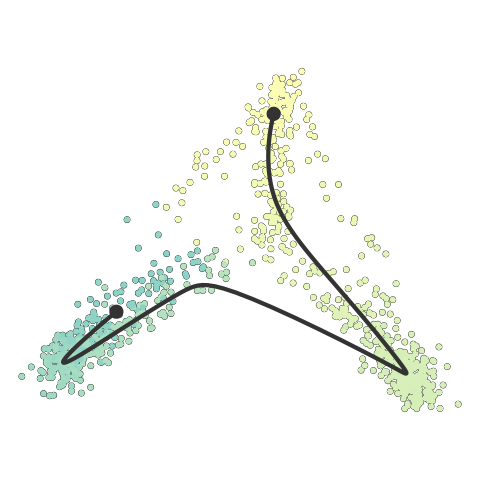

In [41]:
%%R
plot_dimred(scorpius_model, dimred=pca_dimred, grouping=grouping)

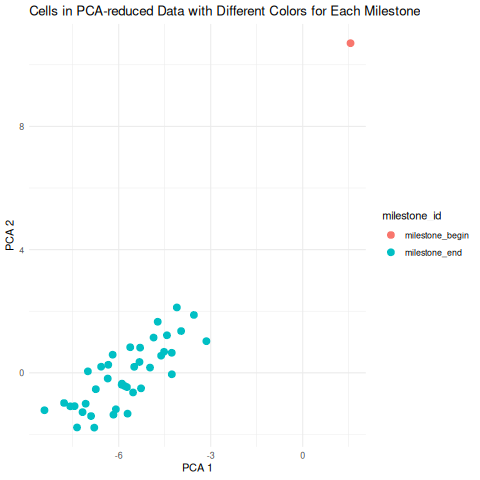

In [42]:
%%R

# Extract cells with percentage == 1
selected_cells <- scorpius_model$milestone_percentages[scorpius_model$milestone_percentages$percentage == 1, ]

# Assuming pca_dimred is a data frame with cell identifiers as row names
# Merge selected cells with pca_dimred to get PCA coordinates
selected_cells_pca <- merge(selected_cells, pca_dimred, by.x = "cell_id", by.y = "row.names")

# Convert milestone_id to a factor for coloring
selected_cells_pca$milestone_id <- as.factor(selected_cells_pca$milestone_id)

ggplot(selected_cells_pca, aes(x = comp_1, y = comp_2, color = milestone_id)) +
  geom_point(size = 3) +
  labs(title = "Cells in PCA-reduced Data with Different Colors for Each Milestone", x = "PCA 1", y = "PCA 2") +
  theme_minimal()

In [43]:
%%R
dpt_model$group_ids

[1] "Tip0" "Tip1" "Tip2" "Tip3"


In [44]:
%%R
dpt_model$grouping

  Cell1   Cell2   Cell3   Cell4   Cell5   Cell6   Cell7   Cell8   Cell9  Cell10 
 "Tip3"  "Tip2"  "Tip2"  "Tip0"  "Tip3"  "Tip3"  "Tip2"  "Tip3"  "Tip2"  "Tip2" 
 Cell11  Cell12  Cell13  Cell14  Cell15  Cell16  Cell17  Cell18  Cell19  Cell21 
 "Tip0"  "Tip2"  "Tip2"  "Tip3"  "Tip0"  "Tip0"  "Tip0"  "Tip2"  "Tip2"  "Tip2" 
 Cell22  Cell23  Cell24  Cell25  Cell26  Cell27  Cell28  Cell29  Cell30  Cell31 
 "Tip3"  "Tip0"  "Tip2"  "Tip3"  "Tip0"  "Tip2"  "Tip0"  "Tip0"  "Tip3"  "Tip3" 
 Cell32  Cell33  Cell34  Cell35  Cell36  Cell37  Cell38  Cell39  Cell40  Cell41 
 "Tip3"  "Tip3"  "Tip2"  "Tip0"  "Tip3"  "Tip3"  "Tip3"  "Tip3"  "Tip0"  "Tip2" 
 Cell42  Cell43  Cell44  Cell45  Cell46  Cell47  Cell48  Cell49  Cell50  Cell51 
 "Tip3"  "Tip2"  "Tip3"  "Tip0"  "Tip0"  "Tip3"  "Tip3"  "Tip3"  "Tip0"  "Tip3" 
 Cell52  Cell53  Cell54  Cell55  Cell56  Cell57  Cell58  Cell59  Cell60  Cell61 
 "Tip0"  "Tip3"  "Tip2"  "Tip3"  "Tip3"  "Tip0"  "Tip0"  "Tip2"  "Tip3"  "Tip3" 
 Cell62  Cell63  Cell64  Cel

In [45]:
%%R
dpt_model$dimred_segment_points

                       comp_1       comp_2        comp_3        comp_4
MILESTONE_WTip0 -0.0059106238 -0.029500246 -1.524649e-03 -9.915237e-04
W2              -0.0057336543 -0.030788372 -1.552581e-03 -1.025326e-03
W3              -0.0055697715 -0.031876538 -1.579463e-03 -1.046649e-03
W4              -0.0054211246 -0.032797410 -1.604059e-03 -1.057575e-03
W5              -0.0052880297 -0.033578214 -1.625896e-03 -1.059913e-03
W6              -0.0051697222 -0.034241367 -1.645000e-03 -1.055140e-03
MILESTONE_WTip1 -0.0050747457 -0.034752951 -1.660133e-03 -1.045696e-03
MILESTONE_WTip0 -0.0059106238 -0.029500246 -1.524649e-03 -9.915237e-04
W9              -0.0048704767 -0.029954296 -1.601899e-03 -9.452294e-04
W10             -0.0037717232 -0.030069935 -1.680044e-03 -8.761798e-04
W11             -0.0025452048 -0.029810905 -1.760224e-03 -7.794648e-04
W12             -0.0011061668 -0.029112461 -1.844260e-03 -6.498533e-04
W13              0.0006483859 -0.027879198 -1.934196e-03 -4.822726e-04
W14   

In [46]:
%%R
dpt_model$dimred_segment_progressions

    from   to percentage
1   Tip0 Tip1 0.00000000
2   Tip0 Tip1 0.16948260
3   Tip0 Tip1 0.33896521
4   Tip0 Tip1 0.50844781
5   Tip0 Tip1 0.67793041
6   Tip0 Tip1 0.84741302
7   Tip0 Tip1 1.00000000
8   Tip0 Tip2 0.00000000
9   Tip0 Tip2 0.01959846
10  Tip0 Tip2 0.03919692
11  Tip0 Tip2 0.05879537
12  Tip0 Tip2 0.07839383
13  Tip0 Tip2 0.09799229
14  Tip0 Tip2 0.11759075
15  Tip0 Tip2 0.13718920
16  Tip0 Tip2 0.15678766
17  Tip0 Tip2 0.17638612
18  Tip0 Tip2 0.19598458
19  Tip0 Tip2 0.21558303
20  Tip0 Tip2 0.23518149
21  Tip0 Tip2 0.25477995
22  Tip0 Tip2 0.27437841
23  Tip0 Tip2 0.29397686
24  Tip0 Tip2 0.31357532
25  Tip0 Tip2 0.33317378
26  Tip0 Tip2 0.35277224
27  Tip0 Tip2 0.37237069
28  Tip0 Tip2 0.39196915
29  Tip0 Tip2 0.41156761
30  Tip0 Tip2 0.43116607
31  Tip0 Tip2 0.45076452
32  Tip0 Tip2 0.47036298
33  Tip0 Tip2 0.48996144
34  Tip0 Tip2 0.50955990
35  Tip0 Tip2 0.52915835
36  Tip0 Tip2 0.54875681
37  Tip0 Tip2 0.56835527
38  Tip0 Tip2 0.58795373
39  Tip0 Tip2 0.60755218


In [47]:
%%R
dpt_model$dimred_milestones

           comp_1      comp_2       comp_3        comp_4      comp_5
Tip0 -0.005910624 -0.02950025 -0.001524649 -0.0009915237  0.01396034
Tip1 -0.005074746 -0.03475295 -0.001660133 -0.0010456958  0.01048679
Tip2  0.052353267  0.02856832  0.006483178 -0.0115860080 -0.02923295
Tip3 -0.045730523  0.03291757  0.012215348  0.0071560401 -0.04381922
            comp_6        comp_7        comp_8       comp_9      comp_10
Tip0  0.0015414481  0.0017020372  0.0015320425  0.004161653 -0.001672827
Tip1  0.0002894949  0.0006317647 -0.0001695202  0.006274244 -0.003324102
Tip2  0.0374998059 -0.0084717176 -0.0392437030  0.030988223  0.021084448
Tip3 -0.0328162628  0.0045980665 -0.0359492771 -0.005263981 -0.010054371
          comp_11      comp_12      comp_13       comp_14       comp_15
Tip0 -0.004377019  0.002933404 -0.002327539 -0.0009950044 -0.0031084025
Tip1 -0.005245106  0.004127853 -0.003314222 -0.0018505694 -0.0040520477
Tip2 -0.014387050 -0.006649563  0.008454775 -0.0061263895 -0.0005532088
Ti

In [48]:
%%R
dpt_model$milestone_ids

[1] "Tip0" "Tip1" "Tip2" "Tip3"


In [49]:
%%R
dpt_model$milestone_network

  from   to      length directed
1 Tip0 Tip1 0.001245188    FALSE
2 Tip0 Tip2 0.010768078    FALSE
3 Tip0 Tip3 0.009090506    FALSE


In [50]:
%%R
dpt_model$milestone_percentages

     cell_id milestone_id  percentage
1      Cell1         Tip0 0.931062647
2     Cell10         Tip0 0.504804242
3    Cell100         Tip0 0.687307547
4    Cell101         Tip0 1.000000000
5    Cell102         Tip0 0.556805461
6    Cell103         Tip0 1.000000000
7    Cell104         Tip0 0.912171061
8    Cell105         Tip0 0.496198475
9    Cell106         Tip0 0.344914772
10   Cell107         Tip0 1.000000000
11   Cell108         Tip0 0.867879276
12   Cell109         Tip0 0.530787483
13    Cell11         Tip0 1.000000000
14   Cell110         Tip0 0.672494547
15   Cell111         Tip0 1.000000000
16   Cell112         Tip0 0.433008395
17   Cell113         Tip0 0.720926420
18   Cell114         Tip0 0.430925178
19   Cell115         Tip0 1.000000000
20   Cell116         Tip0 1.000000000
21   Cell117         Tip0 1.000000000
22   Cell118         Tip0 0.287347511
23   Cell119         Tip0 0.267990124
24    Cell12         Tip0 0.520342283
25   Cell120         Tip0 1.000000000
26   Cell121